In [28]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.model_selection import cross_val_score


In [29]:
# Load the dataset
data = pd.read_csv('P3_flight_Data.csv')

In [30]:
# Preprocess the data
data['DATETIME'] = pd.to_datetime(data['DATE'] + ' ' + data['TIME'], format='%A, %B %d %H:%M', errors='coerce')
data.drop(['DATE', 'TIME'], axis=1, inplace=True)

In [31]:
# Check for missing values
print(data.isnull().sum())

FLIGHT                      0
FROM                        0
TO                          0
AIRLINE                     0
AIRCRAFT                    0
STATUS                      0
TEMPERRATURE_departures     0
WIND_departures             0
DIRECTION_departures        0
TEMPERRATURE_arrival        0
WIND_arrival                0
DIRECTION_arrival           0
scheduled_departures        0
actual_departures           0
scheduled_arrival           0
actual_arrival              0
delay_departure             0
direction_departure         0
delay_arrival               0
direction_arrival           0
scheduled_departure_hour    0
scheduled_arrival_hour      0
DATETIME                    0
dtype: int64


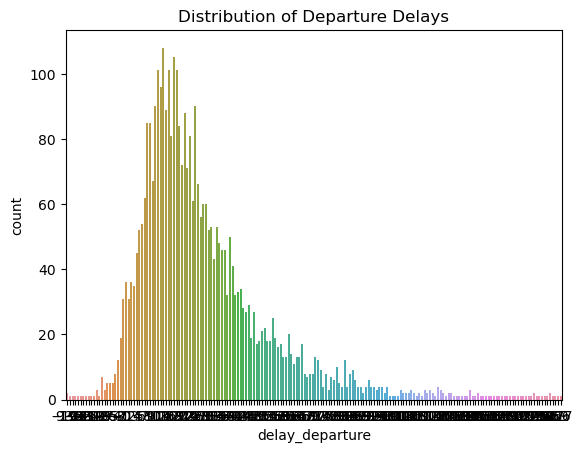

In [32]:
# Explore and visualize the dataset
sns.countplot(x='delay_departure', data=data)
plt.title('Distribution of Departure Delays')
plt.show()

In [33]:
# Extract features from datetime
data['day_of_week'] = data['DATETIME'].dt.dayofweek
data['hour_of_day'] = data['DATETIME'].dt.hour

In [34]:
# Drop unnecessary columns
data.drop(['DATETIME', 'FLIGHT', 'FROM', 'TO', 'AIRLINE', 'AIRCRAFT', 'STATUS'], axis=1, inplace=True)

C:\Users\Dell\AppData\Local\Temp\ipykernel_10452\3807196965.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data.corr(), annot=True, cmap='coolwarm', fmt=".2f")


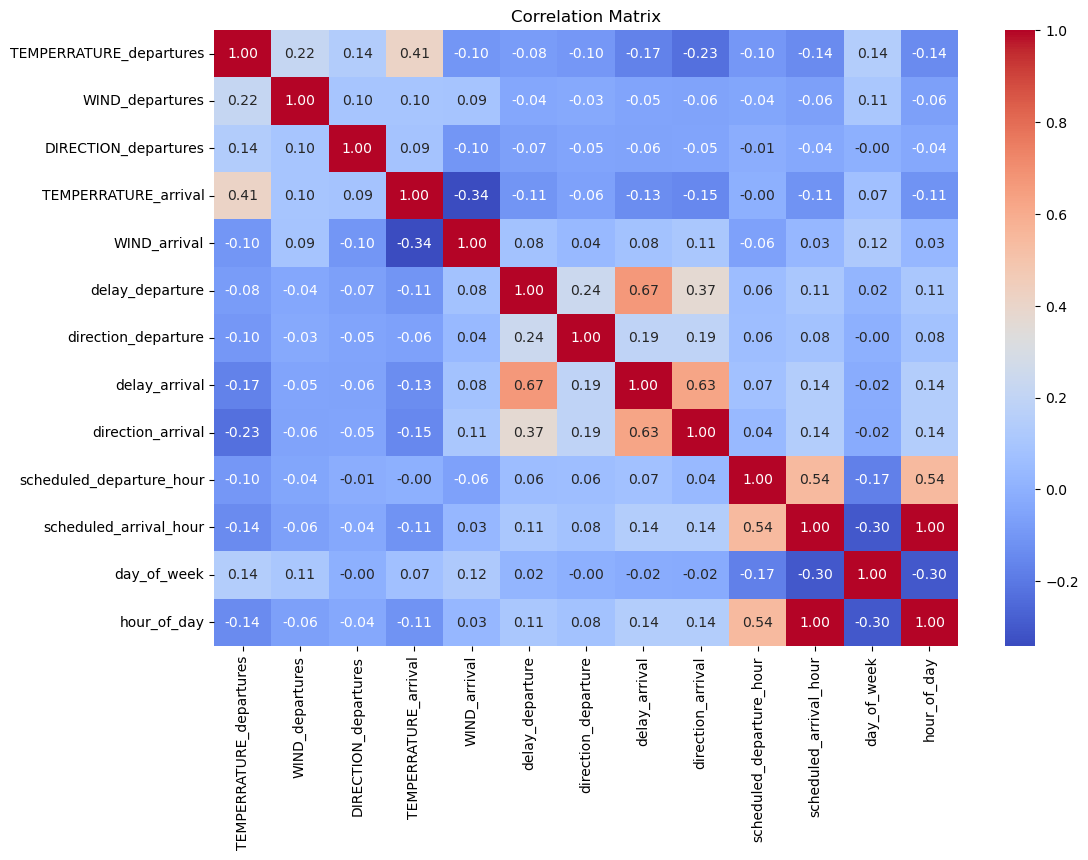

In [35]:
# Explore and visualize the dataset
plt.figure(figsize=(12, 8))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

In [36]:
# Preprocess the data for machine learning models
features = ['TEMPERRATURE_departures', 'WIND_departures', 'DIRECTION_departures',
            'TEMPERRATURE_arrival', 'WIND_arrival', 'DIRECTION_arrival',
            'scheduled_departure_hour', 'scheduled_arrival_hour', 'day_of_week', 'hour_of_day']

In [37]:
X = data[features]
y = data['delay_departure']

In [38]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [39]:
# Handle non-numeric values before scaling
non_numeric_columns = X_train.select_dtypes(include=['object']).columns
if non_numeric_columns.any():
    X_train = X_train.drop(non_numeric_columns, axis=1)
    X_test = X_test.drop(non_numeric_columns, axis=1)

In [40]:
# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [41]:
# Train multiple machine learning models (remaining code remains the same)
models = [
    ('Random Forest', RandomForestRegressor()),
    ('Gradient Boosting', GradientBoostingRegressor()),
    ('Linear Regression', LinearRegression())
]

In [42]:
for name, model in models:
    # Train the model
    model.fit(X_train_scaled, y_train)
    
    # Make predictions
    predictions = model.predict(X_test_scaled)
    
    # Evaluate the model
    mae = mean_absolute_error(y_test, predictions)
    mse = mean_squared_error(y_test, predictions)
    rmse = np.sqrt(mse)
    print(f'{name} - MAE: {mae:.2f}, RMSE: {rmse:.2f}')


Random Forest - MAE: 19.80, RMSE: 30.78
Gradient Boosting - MAE: 18.93, RMSE: 39.84
Linear Regression - MAE: 19.00, RMSE: 42.73


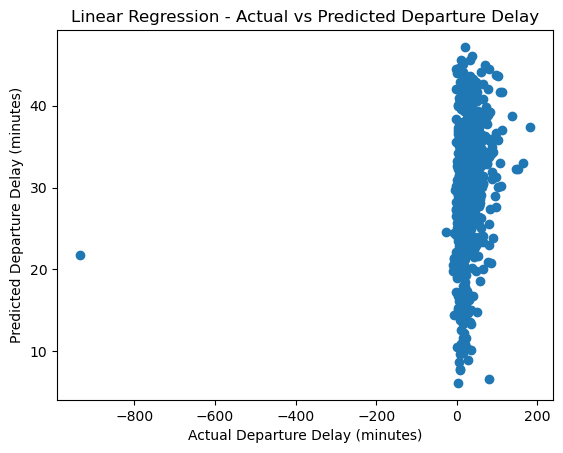

In [43]:
# Visualize predictions
plt.scatter(y_test, predictions)
plt.xlabel('Actual Departure Delay (minutes)')
plt.ylabel('Predicted Departure Delay (minutes)')
plt.title(f'{name} - Actual vs Predicted Departure Delay')
plt.show()

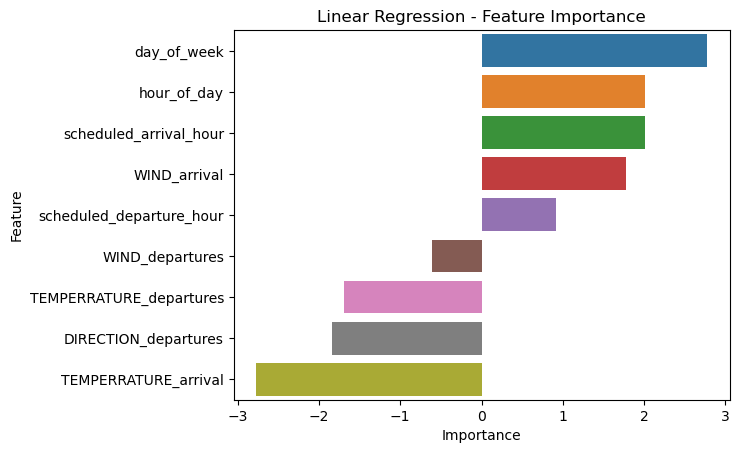

In [45]:
# Feature importance (for models that support it)
if hasattr(model, 'feature_importances_') or hasattr(model, 'coef_'):
    if hasattr(model, 'feature_importances_'):
        feature_importance = pd.DataFrame({'Feature': X_train.columns, 'Importance': model.feature_importances_})
    elif hasattr(model, 'coef_'):
        feature_importance = pd.DataFrame({'Feature': X_train.columns, 'Importance': model.coef_})

    feature_importance = feature_importance.sort_values(by='Importance', ascending=False)
    sns.barplot(x='Importance', y='Feature', data=feature_importance)
    plt.title(f'{name} - Feature Importance')
    plt.show()
